<a href="https://colab.research.google.com/github/y22ecprojectb3-max/speech/blob/main/wav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the main zip file
main_zip_path = '/content/drive/MyDrive/DS_10283_1942.zip'

# Final dataset directory
dataset_dir = '/content/dataset'
os.makedirs(dataset_dir, exist_ok=True)

# Open the main zip file
with zipfile.ZipFile(main_zip_path, 'r') as main_zip_ref:
    # Loop through all files inside the main zip file
    for file_info in main_zip_ref.infolist():
        file_name = file_info.filename

        # Only process .zip files within the main zip
        if file_name.endswith(".zip"):
            # Create a target directory for each inner zip file
            target_dir = os.path.join(dataset_dir, os.path.splitext(file_name)[0])
            os.makedirs(target_dir, exist_ok=True)

            # Extract the inner zip file
            main_zip_ref.extract(file_info, dataset_dir)

            # Extract the contents of the inner zip file into its target directory
            inner_zip_path = os.path.join(dataset_dir, file_name)
            with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip_ref:
                inner_zip_ref.extractall(target_dir)
                print(f"✅ Extracted {file_name} → {target_dir}")

            # Remove the extracted inner zip file after extraction
            os.remove(inner_zip_path)

✅ Extracted clean_trainset_wav.zip → /content/dataset/clean_trainset_wav
✅ Extracted noisy_trainset_wav.zip → /content/dataset/noisy_trainset_wav
✅ Extracted noisy_testset_wav.zip → /content/dataset/noisy_testset_wav
✅ Extracted clean_testset_wav.zip → /content/dataset/clean_testset_wav
✅ Extracted trainset_txt.zip → /content/dataset/trainset_txt
✅ Extracted testset_txt.zip → /content/dataset/testset_txt


In [ ]:
# Show first 10 files in the noisy training set
!ls /content/dataset/noisy_trainset_wav | head -n 10


p226_001.wav
p226_002.wav
p226_003.wav
p226_004.wav
p226_005.wav
p226_006.wav
p226_007.wav
p226_008.wav
p226_009.wav
p226_010.wav


In [ ]:
import os

# Check extracted folders
for root, dirs, files in os.walk('/content/dataset'):
    print(f"\nFolder: {root}")
    for f in files[:10]:  # show only first 10 files
        print("   ", f)


Folder: /content/dataset

Folder: /content/dataset/clean_testset_wav

Folder: /content/dataset/clean_testset_wav/clean_testset_wav
    p232_367.wav
    p257_071.wav
    p257_286.wav
    p257_205.wav
    p232_161.wav
    p232_072.wav
    p232_092.wav
    p257_256.wav
    p257_230.wav
    p232_188.wav

Folder: /content/dataset/noisy_testset_wav

Folder: /content/dataset/noisy_testset_wav/noisy_testset_wav
    p232_367.wav
    p257_071.wav
    p257_286.wav
    p257_205.wav
    p232_161.wav
    p232_072.wav
    p232_092.wav
    p257_256.wav
    p257_230.wav
    p232_188.wav

Folder: /content/dataset/testset_txt
    p232_035.txt
    p232_073.txt
    p232_041.txt
    p232_078.txt
    p232_324.txt
    p257_418.txt
    p257_145.txt
    p232_239.txt
    p257_067.txt
    p257_227.txt

Folder: /content/dataset/testset_txt/__MACOSX
    ._p257_241.txt
    ._p232_314.txt
    ._p257_066.txt
    ._p257_183.txt
    ._p232_288.txt
    ._p257_051.txt
    ._p257_259.txt
    ._p257_373.txt
    ._p232_045.

In [ ]:
!pip install speechbrain pydub

import torchaudio
from speechbrain.pretrained import SpectralMaskEnhancement
from pydub import AudioSegment
import matplotlib.pyplot as plt
import IPython.display as ipd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 50.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoi

In [ ]:
# Load SpeechBrain's speech enhancement model
enhancer = SpectralMaskEnhancement.from_hparams(
    source="speechbrain/metricgan-plus-voicebank",
    savedir="pretrained_models/metricgan-plus-voicebank"
)


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/metricgan-plus-voicebank' if not cached


hyperparams.yaml: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--metricgan-plus-voicebank/snapshots/a196ce26b3bdace6fa1d819017584bdbcce462a8/hyperparams.yaml' -> '/content/pretrained_models/metricgan-plus-voicebank/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/metricgan-plus-voicebank' if not cached
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/usr/local/lib/python3.12/dist-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and vid

enhance_model.ckpt:   0%|          | 0.00/7.59M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--metricgan-plus-voicebank/snapshots/a196ce26b3bdace6fa1d819017584bdbcce462a8/enhance_model.ckpt' -> '/content/pretrained_models/metricgan-plus-voicebank/enhance_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["enhance_model"] = /content/pretrained_models/metricgan-plus-voicebank/enhance_model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: enhance_model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): enhance_model -> /content/pretrained_models/metricgan-plus-voicebank/enhance_model.ckpt


In [ ]:
import os

# Check clean/noisy speech files
print("Clean trainset samples:", len(os.listdir("/content/dataset/clean_trainset_wav")))
print("Noisy trainset samples:", len(os.listdir("/content/dataset/noisy_trainset_wav")))
print("Clean testset samples:", len(os.listdir("/content/dataset/clean_testset_wav")))
print("Noisy testset samples:", len(os.listdir("/content/dataset/noisy_testset_wav")))

# Show a few transcript files
print("\nTranscript samples:")
print(os.listdir("/content/dataset/trainset_txt")[:10])


Clean trainset samples: 11572
Noisy trainset samples: 11572
Clean testset samples: 1
Noisy testset samples: 1

Transcript samples:
['trainset_txt', '__MACOSX']


In [ ]:
import IPython.display as ipd
import random
import scipy.io.wavfile as wavfile

# Pick a random noisy and clean file
noisy_file = "/content/dataset/noisy_trainset_wav/p226_001.wav"
clean_file = "/content/dataset/clean_trainset_wav/p226_001.wav"

# Read audio files
rate_noisy, audio_noisy = wavfile.read(noisy_file)
rate_clean, audio_clean = wavfile.read(clean_file)

print("Noisy Speech:")
ipd.display(ipd.Audio(audio_noisy, rate=rate_noisy))

print("Clean Speech (Ground Truth):")
ipd.display(ipd.Audio(audio_clean, rate=rate_clean))

Noisy Speech:


Clean Speech (Ground Truth):


In [ ]:
import IPython.display as ipd
import scipy.io.wavfile as wavfile
import os

# Example: play noisy and clean speech
noisy_file = "/content/dataset/noisy_trainset_wav/p226_001.wav"
clean_file = "/content/dataset/clean_trainset_wav/p226_001.wav"
enhanced_file = "enhanced_speech.wav" # replace with your output file

# Read audio files
rate_noisy, audio_noisy = wavfile.read(noisy_file)
rate_clean, audio_clean = wavfile.read(clean_file)

print("🔊 Noisy Speech:")
ipd.display(ipd.Audio(audio_noisy, rate=rate_noisy))

print("🔊 Clean Speech (Reference):")
ipd.display(ipd.Audio(audio_clean, rate=rate_clean))

# Check if enhanced file exists before trying to display it
if os.path.exists(enhanced_file):
    rate_enhanced, audio_enhanced = wavfile.read(enhanced_file)
    print("🔊 Enhanced Speech (after model):")
    ipd.display(ipd.Audio(audio_enhanced, rate=rate_enhanced))
else:
    print(f"Enhanced speech file not found at {enhanced_file}. Please run your model to generate it.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/noisy_trainset_wav/p226_001.wav'

In [ ]:
import IPython.display as ipd
import scipy.io.wavfile as wavfile
import os

# Example: play noisy and clean speech
noisy_file = "/content/dataset/noisy_trainset_wav/p226_001.wav"
clean_file = "/content/dataset/clean_trainset_wav/p226_001.wav"
enhanced_file = "enhanced_speech.wav" # replace with your output file

# Read audio files
rate_noisy, audio_noisy = wavfile.read(noisy_file)
rate_clean, audio_clean = wavfile.read(clean_file)

print("🔊 Noisy Speech:")
ipd.display(ipd.Audio(audio_noisy, rate=rate_noisy))

print("🔊 Clean Speech (Reference):")
ipd.display(ipd.Audio(audio_clean, rate=rate_clean))

# Check if enhanced file exists before trying to display it
if os.path.exists(enhanced_file):
    rate_enhanced, audio_enhanced = wavfile.read(enhanced_file)
    print("🔊 Enhanced Speech (after model):")
    ipd.display(ipd.Audio(audio_enhanced, rate=rate_enhanced))
else:
    print(f"Enhanced speech file not found at {enhanced_file}. Please run your model to generate it.")

🔊 Noisy Speech:


🔊 Clean Speech (Reference):


Enhanced speech file not found at enhanced_speech.wav. Please run your model to generate it.


In [ ]:
!ls /content/dataset/noisy_trainset_wav | head -n 10


p226_001.wav
p226_002.wav
p226_003.wav
p226_004.wav
p226_005.wav
p226_006.wav
p226_007.wav
p226_008.wav
p226_009.wav
p226_010.wav


In [ ]:
!pip install speechbrain
import torchaudio
from speechbrain.pretrained import SpectralMaskEnhancement


In [ ]:
enhancer = SpectralMaskEnhancement.from_hparams(
    source="speechbrain/metricgan-plus-voicebank",
    savedir="pretrained_models/metricgan-plus-voicebank"
)


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/pretrained_models/metricgan-plus-voicebank/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/metricgan-plus-voicebank' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/metricgan-plus-voicebank.
INFO:speechbrain.utils.fetching:Fetch enhance_model.ckpt: Using symlink found at '/content/pretrained_models/metricgan-plus-voicebank/enhance_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["enhance_model"] = /content/pretrained_models/metricgan-plus-voicebank/enhance_model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: enhance_model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): enhance_model -> /content/pretrained_models/metricgan-plus-voicebank/enhance_model.ckpt


In [ ]:
noisy_file = "/content/dataset/noisy_trainset_wav/p226_010.wav"  # change to a real file
waveform, fs = torchaudio.load(noisy_file)

print("Noisy Speech:")
import IPython.display as ipd
ipd.display(ipd.Audio(noisy_file))


Noisy Speech:


In [ ]:
import torch

In [ ]:
import torch
import torchaudio
import IPython.display as ipd

enhanced = enhancer.enhance_batch(waveform, lengths=torch.tensor([1.0]))

# Save enhanced speech
torchaudio.save("enhanced_speech.wav", enhanced.cpu(), fs)

print("✅ Enhanced speech saved as enhanced_speech.wav")
ipd.display(ipd.Audio("enhanced_speech.wav"))

✅ Enhanced speech saved as enhanced_speech.wav


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:247: UserWarning: torio.io._streaming_media_encoder.StreamingMediaEncoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s 

In [ ]:
import torch
import torchaudio
import IPython.display as ipd

enhanced = enhancer.enhance_batch(waveform, lengths=torch.tensor([1.0]))

# Save enhanced speech
torchaudio.save("enhanced_speech.wav", enhanced.cpu(), fs)

print("✅ Enhanced speech saved as enhanced_speech.wav")
ipd.display(ipd.Audio("enhanced_speech.wav"))

✅ Enhanced speech saved as enhanced_speech.wav


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:247: UserWarning: torio.io._streaming_media_encoder.StreamingMediaEncoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s 

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

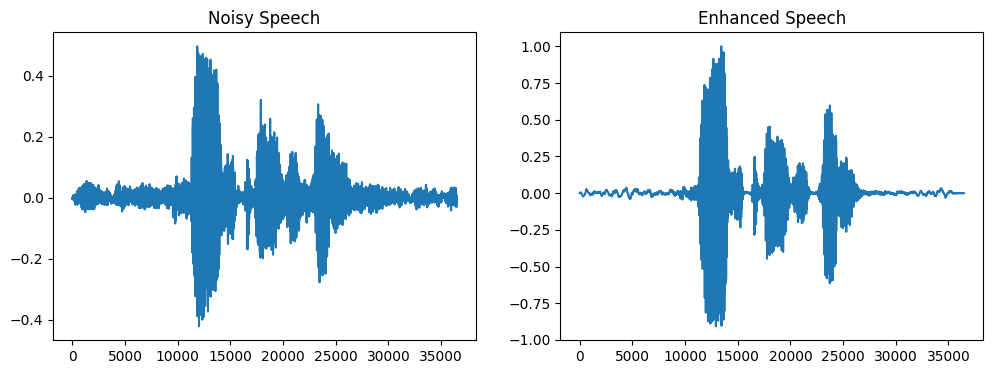

In [ ]:
import matplotlib.pyplot as plt

enhanced_waveform, fs = torchaudio.load("enhanced_speech.wav")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(waveform[0].numpy())
plt.title("Noisy Speech")

plt.subplot(1, 2, 2)
plt.plot(enhanced_waveform[0].numpy())
plt.title("Enhanced Speech")

plt.show()


In [ ]:
import IPython.display as ipd

# Example: play noisy and clean speech
noisy_file = "/content/dataset/noisy_trainset_wav/p226_010.wav"
clean_file = "/content/dataset/clean_trainset_wav/p226_010.wav"

print("🔊 Noisy Speech:")
ipd.display(ipd.Audio(noisy_file))

print("🔊 Clean Speech (Reference):")
ipd.display(ipd.Audio(clean_file))

print("🔊 Enhanced Speech (after model):")
ipd.display(ipd.Audio("enhanced_speech.wav"))  # replace with your output file


🔊 Noisy Speech:


🔊 Clean Speech (Reference):


🔊 Enhanced Speech (after model):


In [ ]:
!ls /content/dataset/noisy_trainset_wav | head -n 10


p226_001.wav
p226_002.wav
p226_003.wav
p226_004.wav
p226_005.wav
p226_006.wav
p226_007.wav
p226_008.wav
p226_009.wav
p226_010.wav


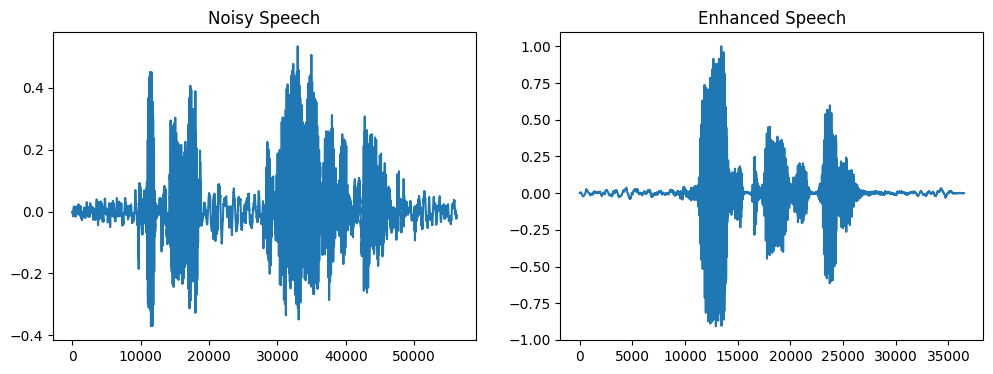

In [ ]:
import torchaudio
import matplotlib.pyplot as plt

waveform, sr = torchaudio.load(noisy_file)
enhanced_waveform, sr = torchaudio.load("enhanced_speech.wav")  # your output

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(waveform[0].numpy())
plt.title("Noisy Speech")

plt.subplot(1, 2, 2)
plt.plot(enhanced_waveform[0].numpy())
plt.title("Enhanced Speech")

plt.show()


In [ ]:
import IPython.display as ipd

# Example: play noisy and clean speech
noisy_file = "/content/dataset/noisy_trainset_wav/p226_009.wav"
clean_file = "/content/dataset/clean_trainset_wav/p226_009.wav"

print("🔊 Noisy Speech:")
ipd.display(ipd.Audio(noisy_file))

print("🔊 Clean Speech (Reference):")
ipd.display(ipd.Audio(clean_file))

print("🔊 Enhanced Speech (after model):")
ipd.display(ipd.Audio("enhanced_speech.wav"))  # replace with your output file


🔊 Noisy Speech:


🔊 Clean Speech (Reference):


🔊 Enhanced Speech (after model):


In [ ]:
!ls /content/dataset/noisy_trainset_wav | head -n 10


p226_001.wav
p226_002.wav
p226_003.wav
p226_004.wav
p226_005.wav
p226_006.wav
p226_007.wav
p226_008.wav
p226_009.wav
p226_010.wav


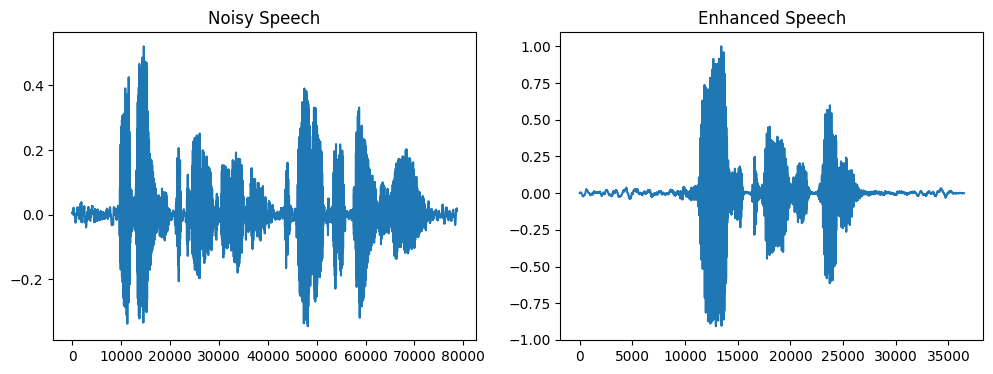

In [ ]:
import torchaudio
import matplotlib.pyplot as plt

waveform, sr = torchaudio.load(noisy_file)
enhanced_waveform, sr = torchaudio.load("enhanced_speech.wav")  # your output

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(waveform[0].numpy())
plt.title("Noisy Speech")

plt.subplot(1, 2, 2)
plt.plot(enhanced_waveform[0].numpy())
plt.title("Enhanced Speech")

plt.show()
